## PCA(Principle Components Analysis)主成分分析

In [10]:
import pandas as pd
df = pd.read_csv("iris.csv", encoding="big5")
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
X = df.drop('屬種', axis=1)
y = df['屬種']

In [12]:
X.corr()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


In [15]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

## PCA(n=4)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=4)
pca.fit(X_std)
X_pca4 = pca.transform(X_std)
X_pca4

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

## 解釋共變異數比率

In [55]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [56]:
def accumlate(x):
    p=[]
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

In [58]:
p_acc = accumlate(pca.explained_variance_ratio_)
p_acc

[0.7277045209380135,
 0.9580097536148199,
 0.9948480731910938,
 1.0000000000000002]

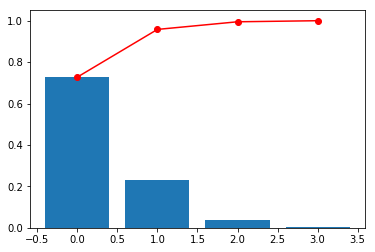

In [59]:
y1 = pca.explained_variance_ratio_
y2 = accumlate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x, y1)
plt.plot(x, y2, 'r-o')
plt.show()

## PCA(n=2)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca2 = pca.transform(X_std)
X_pca2

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [62]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [63]:
pd.DataFrame(X_pca2).corr()

,0,1
0,1.000000e+00,1.456964e-16
1,1.456964e-16,1.000000e+00


In [64]:
from sklearn.preprocessing import LabelEncoder
# 把類別轉成0,1,2，散佈圖上色用
le = LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_label = le.transform(y)

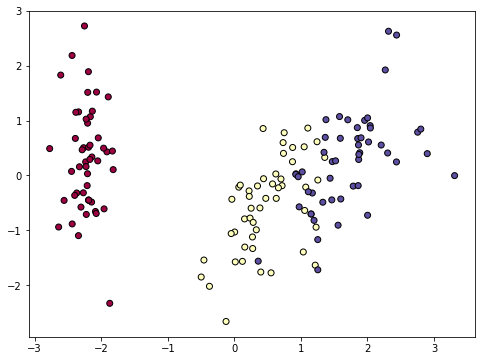

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_label, cmap=plt.cm.Spectral, edgecolor='k')
plt.show()

## KNN

In [115]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),
                               labels=['Iris-setosa', 'Iris-versicolor', 
                                       'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.98        21
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.93      0.97        15

      micro avg       0.96      0.96      0.96        45
      macro avg       0.94      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

[[20  1  0]
 [ 0  9  0]
 [ 0  1 14]]


## KNN with PCA

In [116]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_pca2, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),
                               labels=['Iris-setosa', 'Iris-versicolor', 
                                       'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.71      0.83      0.77        12
 Iris-virginica       0.88      0.78      0.82        18

      micro avg       0.87      0.87      0.87        45
      macro avg       0.86      0.87      0.86        45
   weighted avg       0.87      0.87      0.87        45

[[15  0  0]
 [ 0 10  2]
 [ 0  4 14]]
